In [141]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import ast
import warnings
pd.set_option("display.max_columns", 100)
warnings.simplefilter("ignore")
plt.style.use("ggplot")
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [142]:
df=pd.read_csv('E:\\py\\scraping_mal\\cleaned_data.csv')

In [143]:
def data_info(data):
  print(50*' ',20*'^','About The Data','^'*20,2*"\n")
  print(2*"\n","Data Info:",2*"\n")
  print(data.info())
  print(f'\n \n Null Conut:\n{data.isnull().sum()} \n\n ')
  uniques=[]
  for i in data.columns:
    if  data[i].nunique()<10:
      uniques.append(i)
  print(f'\n \n Number of unique columns ={len(uniques)}\n Names: {uniques}')
  for i in data.columns:
    if  data[i].nunique()<10:
      print(f'\n \n Number Of Unique Cols In {i} = {data[i].nunique()}\n Values Are: \n{data[i].unique()}')
    elif data[i].nunique()<10:
      return 'No unique values'
  print(50*' ',20*'^','Data Statstics',20*'^',2*'\n')
  for i in data.columns:
    print(f'\n Statstics for {i} is: \n{data[i].describe()} \n \n')

In [144]:
del(df['Unnamed: 0'])

In [145]:
data_info(df)

                                                   ^^^^^^^^^^^^^^^^^^^^ About The Data ^^^^^^^^^^^^^^^^^^^^ 




 Data Info: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1249 non-null   object 
 1   Score                1249 non-null   float64
 2   Score_Rank           1249 non-null   int64  
 3   Popularity_Rank      1249 non-null   int64  
 4   Members              1249 non-null   int64  
 5   Favorites            1249 non-null   int64  
 6   Studio               1249 non-null   object 
 7   episodes             1249 non-null   object 
 8   Genres               1249 non-null   object 
 9   Theme(s)             1249 non-null   object 
 10  Demographic          1249 non-null   object 
 11  rating               1249 non-null   object 
 12  duration             1249 non-null   object 
 13  platform  

In [146]:
df.Alternative_version

0                                                     NaN
1                                     Fullmetal Alchemist
2                                                     NaN
3       Steins;Gate__Kyoukaimenjou no Missing Link - D...
4                                                     NaN
                              ...                        
1244                                                  NaN
1245                                                  NaN
1246                                                  NaN
1247                                                  NaN
1248                                                  NaN
Name: Alternative_version, Length: 1249, dtype: object

on the top 1000 animes only 15% are remasters of an (got an improve on **'art', 'music'**,etc) 


([<matplotlib.patches.Wedge at 0x1462cc0b700>,
 [Text(0.9650548506481326, 0.527891215346979, 'No_Alternative_version'),
  Text(-1.2282515966455132, -0.6718616043038537, 'Have_Alternative_version')],
 [Text(0.5263935548989813, 0.287940662916534, '15.9%'),
  Text(-0.7895903121292583, -0.43191103133819153, '84.1%')])

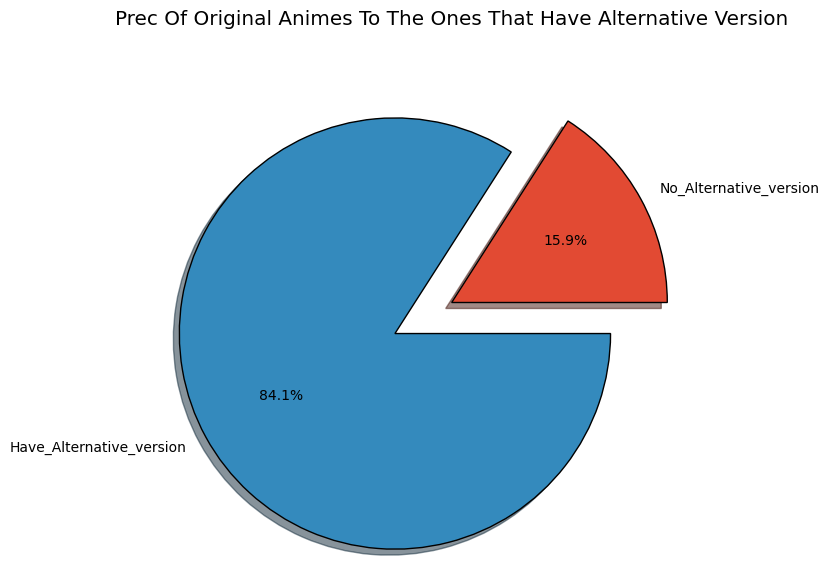

In [147]:
x=[]
none_count = df['Alternative_version'].isnull().sum()
not_none_count= len(df["Alternative_version"].dropna())
labels = [ 'No_Alternative_version','Have_Alternative_version']
counts = [not_none_count, none_count]
plt.figure(figsize=(14,7))
plt.title('Prec of original animes to the ones that have Alternative version'.title())
plt.pie(counts, labels=labels,shadow=True,explode =(0,.3),wedgeprops={ 'linewidth' : 1, 'edgecolor' : "black" }, autopct='%1.1f%%')

around 85% of the top ranked animes are the **Not original** work and are **Alternative_version** and dont have one  

([<matplotlib.patches.Wedge at 0x1462958d610>,
 [Text(0.8730394430769267, 0.6691801930959477, 'No_Side_story'),
  Text(-1.1111411093706343, -0.8516838821221147, 'Have_Side_story')],
 [Text(0.47620333258741454, 0.365007378052335, '20.8%'),
  Text(-0.714304998881122, -0.5475110670785023, '79.2%')])

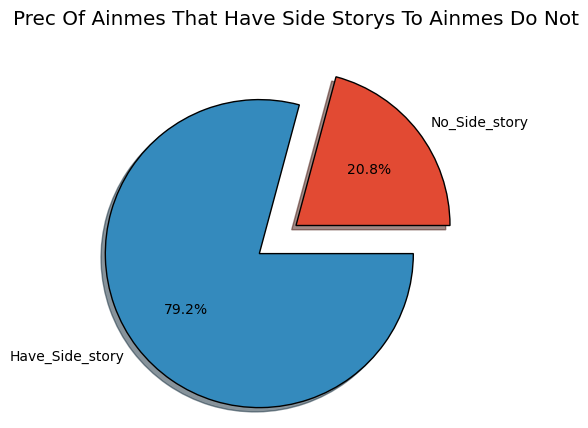

In [148]:
x=[]
none_count = df['Side_story'].isnull().sum()
not_none_count= len(df["Side_story"].dropna())
labels = [ 'No_Side_story','Have_Side_story']
counts = [not_none_count, none_count]
plt.figure(figsize=(14,5))
plt.title('prec of ainmes that have side storys to ainmes do not'.title())
plt.pie(counts, labels=labels,shadow=True,explode =(0,.3),wedgeprops={ 'linewidth' : 1, 'edgecolor' : "black" }, autopct='%1.1f%%')

80% of the animes have anime or movie side story of the anime

([<matplotlib.patches.Wedge at 0x1462e216eb0>,
 [Text(-0.1087869657707831, 1.0946074164185016, 'Stand alone'),
  Text(0.13845600781885048, -1.3931367247685587, 'Series')],
 [Text(-0.05933834496588169, 0.597058590773728, '53.2%'),
  Text(0.08900743359783243, -0.8955878944940733, '46.8%')])

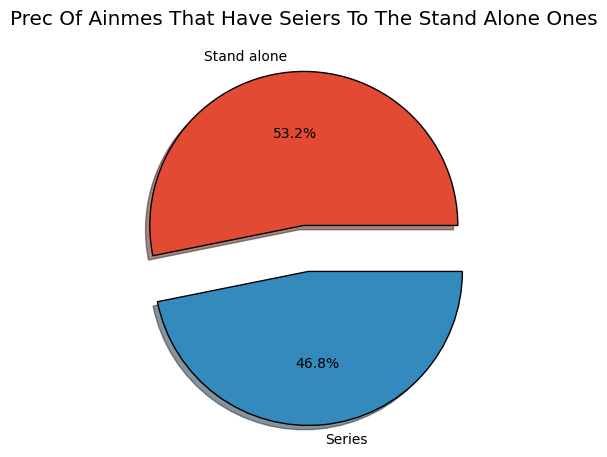

In [149]:
x=[]
none_count = df['Adaptation'].isnull().sum()
No_none_count= len(df["Adaptation"].dropna())
labels = ['Stand alone','Series']
counts = [none_count, not_none_count]
plt.figure(figsize=(14,5))
plt.title('Prec of Ainmes that have seiers to the stand alone ones'.title())
plt.pie(counts, labels=labels,shadow=True,explode =(0,.3),wedgeprops={ 'linewidth' : 1, 'edgecolor' : "black" }, autopct='%1.1f%%')

out of top ranked animes only 40% of the animes that have **seires** and the rest are **stand alone** animes
(completed on one show)

In [150]:
df.head(10)

,Name,Score,Score_Rank,Popularity_Rank,Members,Favorites,Studio,episodes,Genres,Theme(s),Demographic,rating,duration,platform,aired_time,overview,related_animes,caracter_name,hero,sup_heros,supporters,Adaptation,Prequel,Alternative_version,Side_story,Sequel
0,Shingeki no Kyojin: The Final Season - Kankets...,9.11,1,540,382365,7691,MAPPA,2,"Action, Drama, Suspense","Gore, Military, Survival",Shounen,R - 17+ (violence & profanity),1 hr. 1 min.,Special,Mar 4/2023 to 2023,The conclusion to Shingeki no Kyojin.,"{'Adaptation': 'Shingeki no Kyojin', 'Prequel'...","{'Eren Yeager': 'Main', 'Mikasa Ackerman': 'Ma...",Eren Yeager,"['Mikasa Ackerman', 'Armin Arlert']","['Erwin Smith', 'Hange Zoë', 'Gabi Braun', 'Re...",Shingeki no Kyojin,Shingeki no Kyojin__The Final Season Part 2,NaN,NaN,NaN
1,Fullmetal Alchemist: Brotherhood,9.11,2,3,3126427,215118,Bones,64,"Action, Adventure, Drama, Fantasy",Military,Shounen,R - 17+ (violence & profanity),24 min.,TV,Apr 5/2009 to Jul 4/2010,After a horrific alchemy experiment goes wrong...,"{'Adaptation': 'Fullmetal Alchemist', 'Alterna...","{'Edward Elric': 'Main', 'Alphonse Elric': 'Ma...",Edward Elric,['Alphonse Elric'],"['Roy Mustang', 'Maes Hughes', 'Riza Hawkeye',...",Fullmetal Alchemist,NaN,Fullmetal Alchemist,Fullmetal Alchemist__Brotherhood Specials,NaN
2,Bleach: Sennen Kessen-hen,9.08,3,495,415763,16764,Pierrot,13,"Action, Adventure, Fantasy",Military,Shounen,R - 17+ (violence & profanity),24 min.,TV,Oct 11/2022 to Dec 27/2022,Substitute Soul Reaper Ichigo Kurosaki spends ...,"{'Adaptation': 'Bleach', 'Prequel': 'Bleach', ...","{'Ichigo Kurosaki': 'Main', 'Rukia Kuchiki': '...",Ichigo Kurosaki,"['Rukia Kuchiki', 'Orihime Inoue', 'Renji Abar...","['Kenpachi Zaraki', 'Kisuke Urahara', 'Sousuke...",Bleach,Bleach,NaN,NaN,Bleach__Sennen Kessen-hen - Ketsubetsu-tan
3,Steins;Gate,9.08,4,13,2405975,180957,White Fox,24,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",Shounen,PG-13 - Teens 13 or older,24 min.,TV,Apr 6/2011 to Sep 14/2011,Eccentric scientist Rintarou Okabe has a never...,"{'Adaptation': 'Steins;Gate', 'Alternative set...","{'Rintarou Okabe': 'Main', 'Kurisu Makise': 'M...",Rintarou Okabe,"['Kurisu Makise', 'Mayuri Shiina', 'Itaru Hash...","['Suzuha Amane', 'Ruka Urushibara', 'Rumiho Ak...",Steins;Gate,NaN,Steins;Gate__Kyoukaimenjou no Missing Link - D...,NaN,Steins;Gate__Oukoubakko no Poriomania
4,Gintama°,9.07,5,334,585428,15684,Bandai Namco Pictures,51,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,PG-13 - Teens 13 or older,24 min.,TV,Apr 8/2015 to Mar 30/2016,"Gintoki, Shinpachi, and Kagura return as the f...","{'Adaptation': 'Gintama', 'Prequel': 'Gintama ...","{'Gintoki Sakata': 'Main', 'Shinpachi Shimura'...",Gintoki Sakata,"['Shinpachi Shimura', 'Kotarou Katsura']","['Toushirou Hijikata', 'Sougo Okita', 'Shinsuk...",Gintama,Gintama Movie 2__Kanketsu-hen - Yorozuya yo Ei...,NaN,Gintama°__Umai-mono wa Atomawashi ni Suru to Y...,Gintama.
5,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.06,6,211,786051,28043,A-1 Pictures,13,"Comedy, Romance",School,Seinen,PG-13 - Teens 13 or older,23 min.,TV,Apr 9/2022 to Jun 25/2022,The elite members of Shuchiin Academy student ...,{'Adaptation': 'Kaguya-sama wa Kokurasetai__Te...,"{'Kaguya Shinomiya': 'Main', 'Yuu Ishigami': '...",Kaguya Shinomiya,"['Yuu Ishigami', 'Chika Fujiwara', 'Miyuki Shi...","['Ai Hayasaka', 'Kei Shirogane', 'Father Shiro...",Kaguya-sama wa Kokurasetai__Tensai-tachi no Re...,Kaguya-sama wa Kokurasetai? Tensai-tachi no Re...,NaN,Kaguya-sama wa Kokurasetai__Ultra Romantic Tea...,Kaguya-sama wa Kokurasetai__First Kiss wa Owar...
6,Shingeki no Kyojin Season 3 Part 2,9.06,7,25,2062868,54665,Wit Studio,10,"Action, Drama","Gore, Military, Survival",Shounen,R - 17+ (violence & profanity),23 min.,TV,Apr 29/2019 to Jul 1/2019,"Seeking to restore humanity diminishing hope, ...","{'Adaptation': 'Shingeki no Kyojin', 'Prequel'...","{'Eren Yeager': 'Main', 'Mikasa Ackerman': 'Ma...",Eren Yeager,"['Mikasa Ack

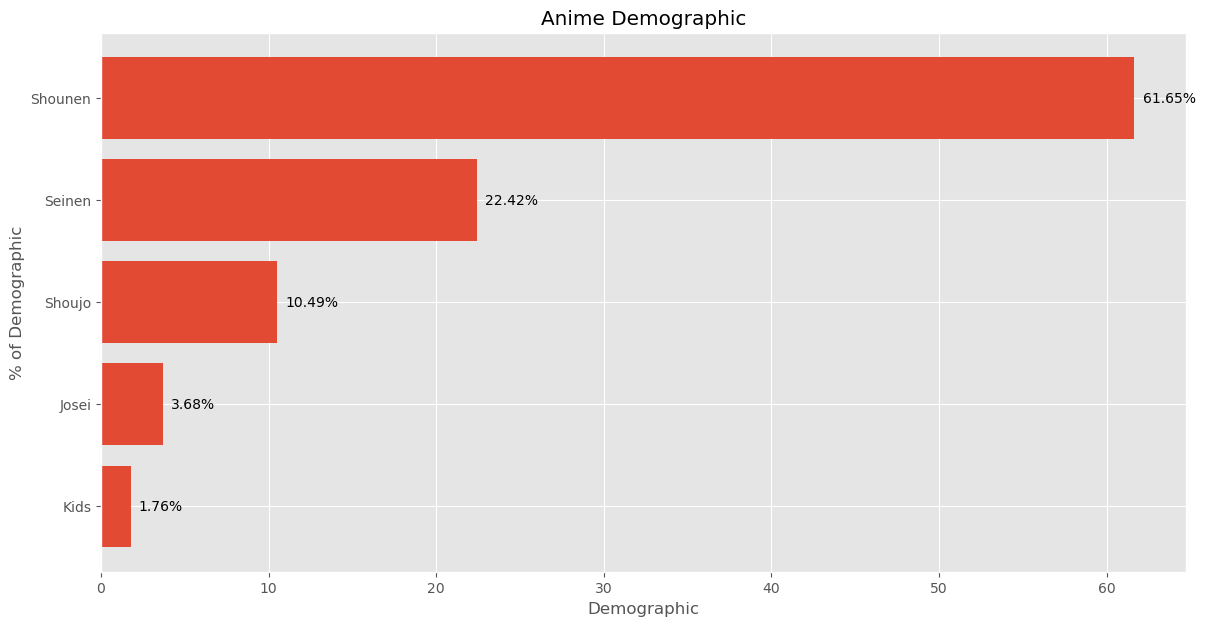

In [151]:
count = df.groupby('Demographic')['Demographic'].count().sort_values(ascending=True).to_frame()
count = count.rename(columns={'Demographic':'count'})
#count.set_index('Demographic',inplace=True)
count['count']=round(count['count']/len(df)*100,2)

fig, ax = plt.subplots(figsize=(14,7))
ax.barh(count.index,count['count'])

for i, v in enumerate(count['count']):
    ax.text(v+.5, i, str(v) + '%', color='black', fontsize=10, va='center')

plt.title("Anime Demographic")
ax.set_xlabel('Demographic')
ax.set_ylabel('% of Demographic')
plt.show()

the **Shounen** demographic is takeing the majorty of the show with around 60% of the highest anime ranking of all time 


Text(0.5, 1.0, 'Stuidos & Anime Prodiction Count')

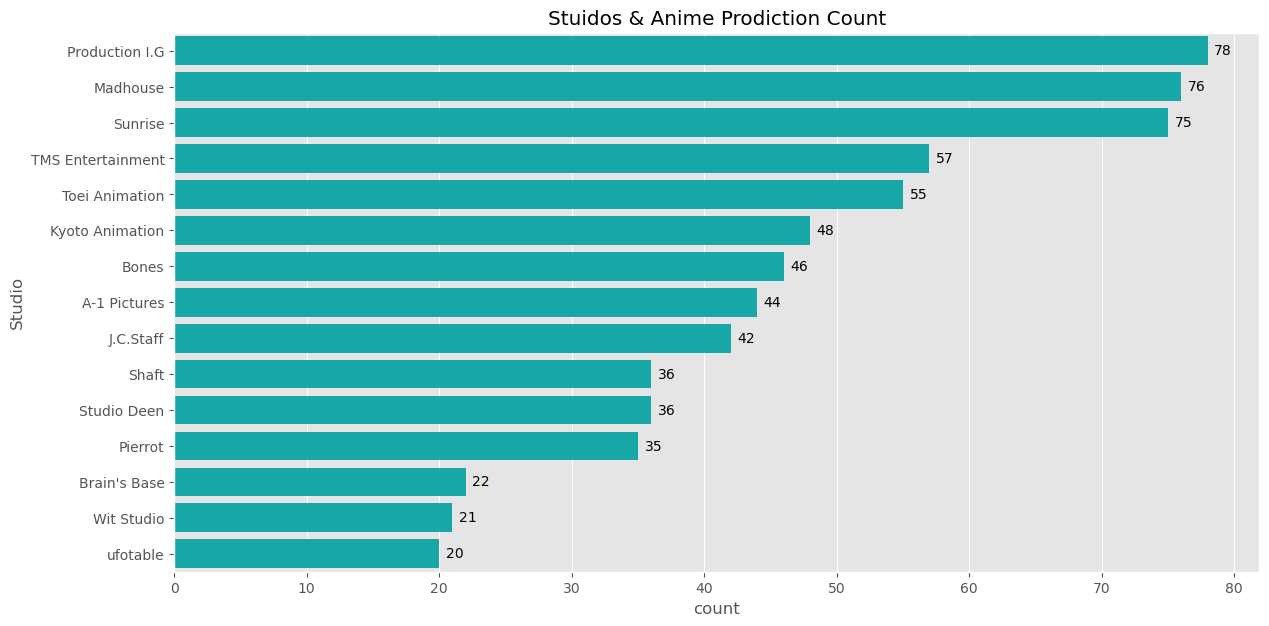

In [152]:
count = df.groupby('Studio')['Studio'].count().sort_values(ascending=False).to_frame()[:15]
count = count.rename(columns={'Studio':'count'})
#count['count']=round(count['count']/len(df)*100,2)

fig, ax = plt.subplots(figsize=(14,7))
ax=sns.barplot(data=count,y=count.index,x='count',color='c')

for i, v in enumerate(count['count']):
    ax.text(v+.5 ,i, str(v), color='black', fontsize=10, va='center')
plt.title('Stuidos & Anime Prodiction Count')

In [153]:
df.head()

,Name,Score,Score_Rank,Popularity_Rank,Members,Favorites,Studio,episodes,Genres,Theme(s),Demographic,rating,duration,platform,aired_time,overview,related_animes,caracter_name,hero,sup_heros,supporters,Adaptation,Prequel,Alternative_version,Side_story,Sequel
0,Shingeki no Kyojin: The Final Season - Kankets...,9.11,1,540,382365,7691,MAPPA,2,"Action, Drama, Suspense","Gore, Military, Survival",Shounen,R - 17+ (violence & profanity),1 hr. 1 min.,Special,Mar 4/2023 to 2023,The conclusion to Shingeki no Kyojin.,"{'Adaptation': 'Shingeki no Kyojin', 'Prequel'...","{'Eren Yeager': 'Main', 'Mikasa Ackerman': 'Ma...",Eren Yeager,"['Mikasa Ackerman', 'Armin Arlert']","['Erwin Smith', 'Hange Zoë', 'Gabi Braun', 'Re...",Shingeki no Kyojin,Shingeki no Kyojin__The Final Season Part 2,NaN,NaN,NaN
1,Fullmetal Alchemist: Brotherhood,9.11,2,3,3126427,215118,Bones,64,"Action, Adventure, Drama, Fantasy",Military,Shounen,R - 17+ (violence & profanity),24 min.,TV,Apr 5/2009 to Jul 4/2010,After a horrific alchemy experiment goes wrong...,"{'Adaptation': 'Fullmetal Alchemist', 'Alterna...","{'Edward Elric': 'Main', 'Alphonse Elric': 'Ma...",Edward Elric,['Alphonse Elric'],"['Roy Mustang', 'Maes Hughes', 'Riza Hawkeye',...",Fullmetal Alchemist,NaN,Fullmetal Alchemist,Fullmetal Alchemist__Brotherhood Specials,NaN
2,Bleach: Sennen Kessen-hen,9.08,3,495,415763,16764,Pierrot,13,"Action, Adventure, Fantasy",Military,Shounen,R - 17+ (violence & profanity),24 min.,TV,Oct 11/2022 to Dec 27/2022,Substitute Soul Reaper Ichigo Kurosaki spends ...,"{'Adaptation': 'Bleach', 'Prequel': 'Bleach', ...","{'Ichigo Kurosaki': 'Main', 'Rukia Kuchiki': '...",Ichigo Kurosaki,"['Rukia Kuchiki', 'Orihime Inoue', 'Renji Abar...","['Kenpachi Zaraki', 'Kisuke Urahara', 'Sousuke...",Bleach,Bleach,NaN,NaN,Bleach__Sennen Kessen-hen - Ketsubetsu-tan
3,Steins;Gate,9.08,4,13,2405975,180957,White Fox,24,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",Shounen,PG-13 - Teens 13 or older,24 min.,TV,Apr 6/2011 to Sep 14/2011,Eccentric scientist Rintarou Okabe has a never...,"{'Adaptation': 'Steins;Gate', 'Alternative set...","{'Rintarou Okabe': 'Main', 'Kurisu Makise': 'M...",Rintarou Okabe,"['Kurisu Makise', 'Mayuri Shiina', 'Itaru Hash...","['Suzuha Amane', 'Ruka Urushibara', 'Rumiho Ak...",Steins;Gate,NaN,Steins;Gate__Kyoukaimenjou no Missing Link - D...,NaN,Steins;Gate__Oukoubakko no Poriomania
4,Gintama°,9.07,5,334,585428,15684,Bandai Namco Pictures,51,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,PG-13 - Teens 13 or older,24 min.,TV,Apr 8/2015 to Mar 30/2016,"Gintoki, Shinpachi, and Kagura return as the f...","{'Adaptation': 'Gintama', 'Prequel': 'Gintama ...","{'Gintoki Sakata': 'Main', 'Shinpachi Shimura'...",Gintoki Sakata,"['Shinpachi Shimura', 'Kotarou Katsura']","['Toushirou Hijikata', 'Sougo Okita', 'Shinsuk...",Gintama,Gintama Movie 2__Kanketsu-hen - Yorozuya yo Ei...,NaN,Gintama°__Umai-mono wa Atomawashi ni Suru to Y...,Gintama.


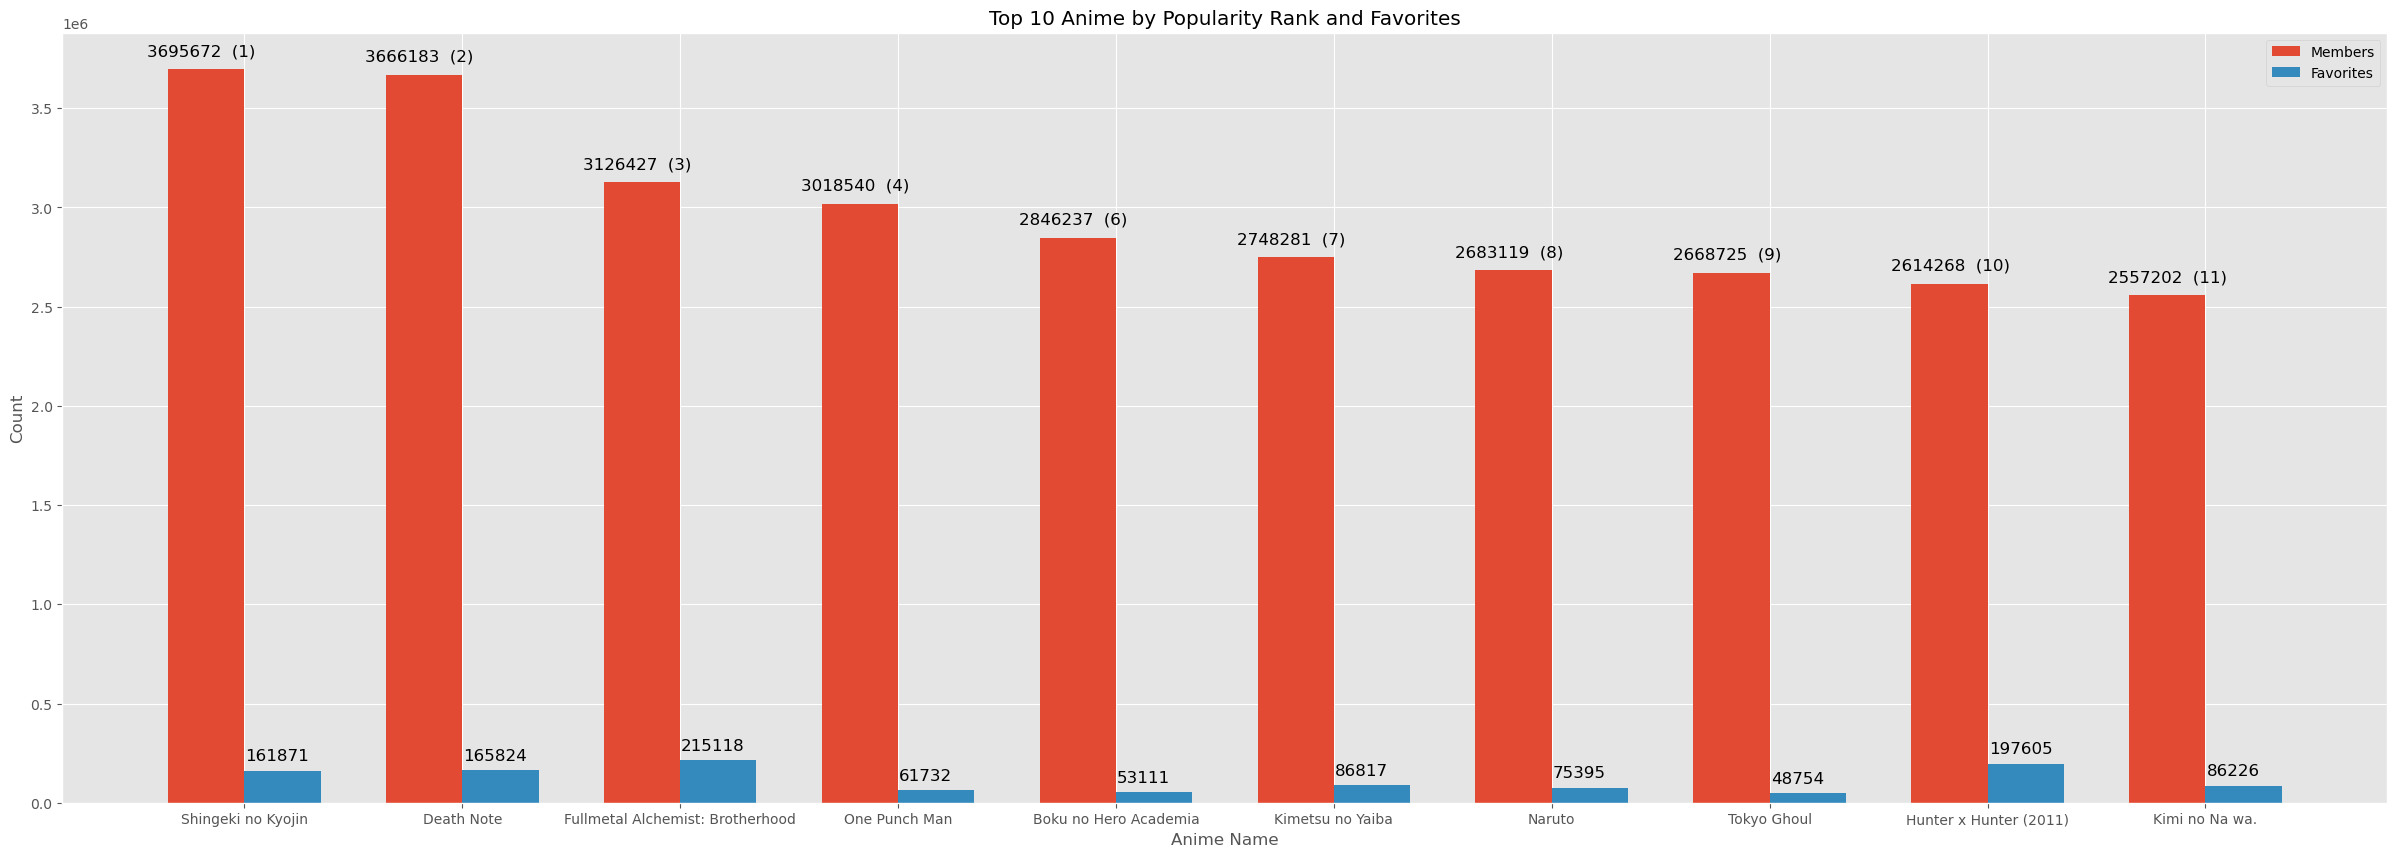

In [196]:
import matplotlib.pyplot as plt
import numpy as np

top_anime_members = df[['Name', 'Members','Popularity_Rank', 'Favorites']].sort_values(by='Members', ascending=False).head(10)
top_anime_members = top_anime_members.reset_index().drop('index', axis=1)
fig, ax = plt.subplots(figsize=(30, 10))

bar_width = 0.35

x1 = np.arange(len(top_anime_members))

x2 = x1 + bar_width

ax.bar(x1, top_anime_members['Members'], width=bar_width, label='Members')

ax.bar(x2, top_anime_members['Favorites'], width=bar_width, label='Favorites')


for i, v in enumerate(top_anime_members['Members']):
    ax.text(i - 0.27, v + 70000, str(v) + "  (" + str(top_anime_members['Popularity_Rank'][i]) + ')',color='black', fontsize=12)
for i, v in enumerate(top_anime_members['Favorites']):
    ax.text(i + 0.18, v + 50000, str(v), color='black', fontsize=12)

ax.set_xticks(x1 + bar_width / 2)
ax.set_xticklabels(top_anime_members['Name'])

plt.title('Top 10 Anime by Popularity Rank and Favorites')
plt.xlabel("Anime Name")
plt.ylabel("Count")

ax.legend()

plt.show()



In [155]:

top_anime_Favorites = df[['Name', 'Favorites']].sort_values(by='Favorites', ascending=False).head(10)
top_anime_Favorites=top_anime_Favorites.reset_index().drop('index',axis=1)

top_anime_Favorites['Favorites_rank']=top_anime_Favorites.index+1
top_anime_Favorites

,Name,Favorites,Favorites_rank
0,Fullmetal Alchemist: Brotherhood,215118,1
1,Hunter x Hunter (2011),197605,2
2,One Piece,193981,3
3,Steins;Gate,180957,4
4,Death Note,165824,5
5,Shingeki no Kyojin,161871,6
6,Naruto: Shippuuden,106202,7
7,Code Geass: Hangyaku no Lelouch,104367,8
8,Neon Genesis Evangelion,99139,9
9,Kimetsu no Yaiba,86817,10


The members shows how popular the anime is the most popular 2 by far are **attack on titen'1'** and **Death Note'2'** and the rest are close to each others
<br>
<br>
unexpectedly they are not the most Favorites as **fullmetal '1'** and **HXH '2'** comes in the frist 2 places as most favorites and the most popular ones comes in the **Death Note '5'** and **attack on titen'6'**

In [108]:
genra=df['Genres']

In [109]:
splited_genra=[]
singler_genra=[]
for word in genra:
    result = word.split(',')
    splited_genra.append(result)
for i in splited_genra:
    for j in range (len(i)):
        singler_genra.append(i[j])

In [110]:
single_genra = pd.DataFrame({"genra":[]})
single_genra['genra']=singler_genra
genra_count=single_genra.groupby('genra')['genra'].count().sort_values(ascending=False).to_frame()
genra_count.rename(columns={'genra':'count'},inplace=True)
genra_count['count']=round(genra_count['count']/len(df)*100,2)
#genra_count.reset_index(inplace=True)

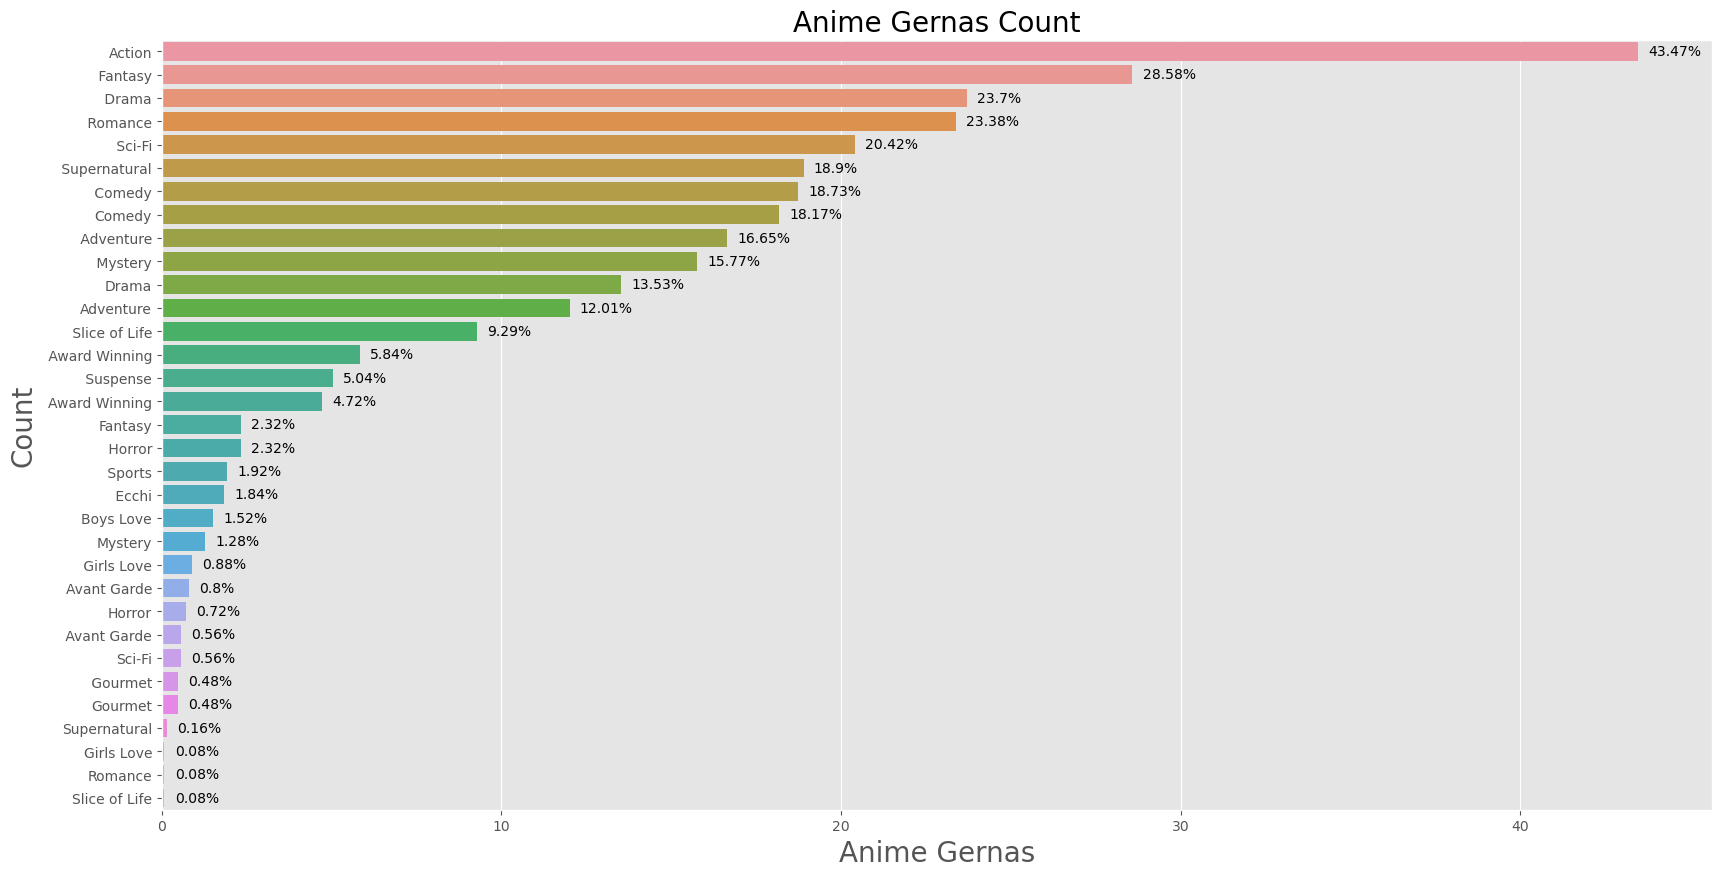

In [111]:
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.barplot(data=genra_count,y=genra_count.index,x='count')

for i, v in enumerate(genra_count['count']):
    ax.text(v+.3 ,i, str(v)+'%', color='black', fontsize=10, va='center')
    
plt.title("Anime Gernas Count",fontsize = 20)
plt.xlabel('Anime Gernas',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

The **Action** genre dominates **43%** of the animes and **Fantasy** with **28%** and with less than **1%** gose to **Girls Love,Romance and Slice of life** genres

In [197]:
themes=df['Theme(s)']

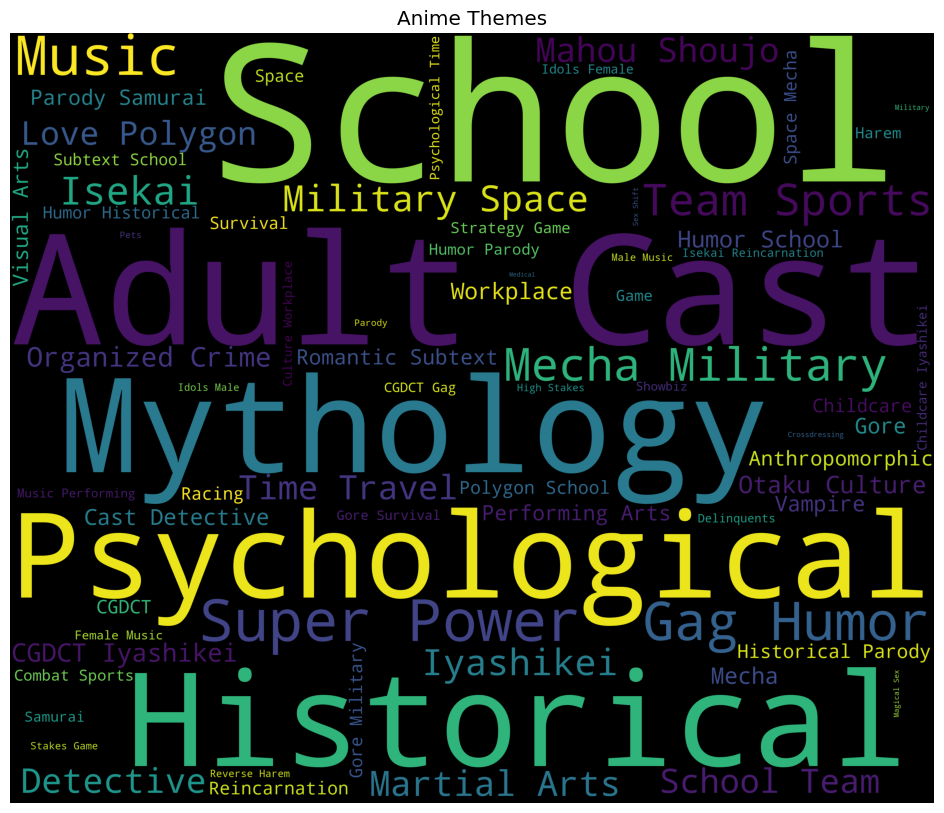

In [200]:
words = ' '.join(themes)
cleaned_word = " ".join([word for word in words.split()
                            if 'id' not in word
                                and not word.startswith('@')
                                and 'name' not in word
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(15,10))
plt.imshow(wordcloud)
plt.title('Anime Themes')
plt.axis('off')
plt.show()

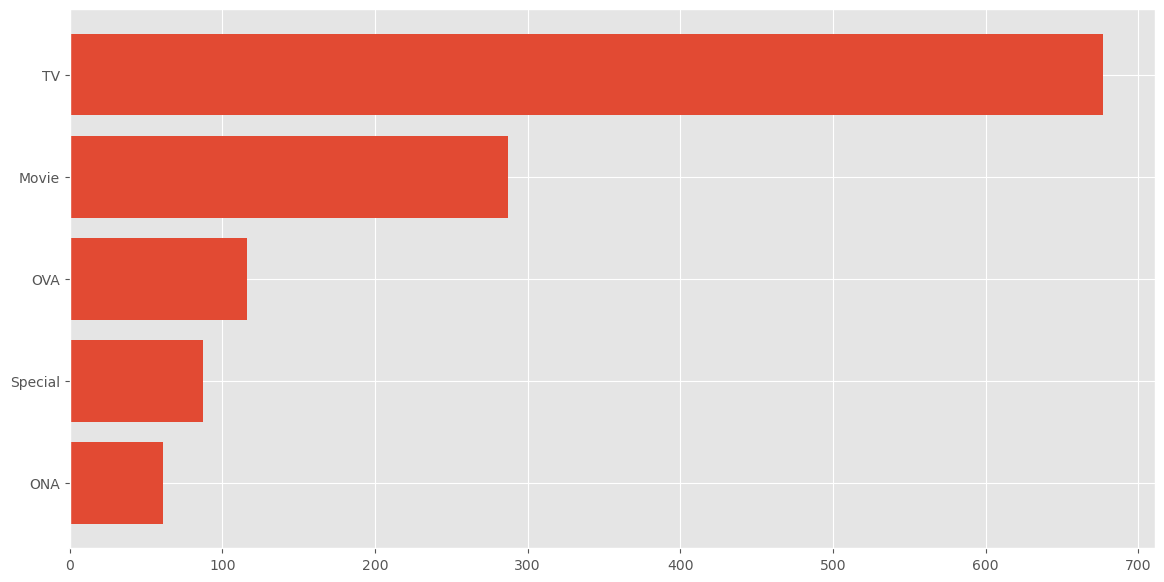

In [199]:
plt.figure(figsize=(14,7))
platform_count = df.groupby('platform')['platform'].count().sort_values().to_frame()[1:]
plt.barh(platform_count.index, platform_count['platform'])
plt.show()

over half of the production of the ainme gose to **TV** as a main platform but we can not lose sight of **Movies** too in the second place but not as heavy as **TV**

In [115]:
top_10_popularity=df[['Name','Popularity_Rank','Score']].sort_values(by=['Popularity_Rank', 'Score'])[:10]
top_10_popularity

,Name,Popularity_Rank,Score
110,Shingeki no Kyojin,1,8.53
77,Death Note,2,8.62
1,Fullmetal Alchemist: Brotherhood,3,9.11
127,One Punch Man,4,8.50
730,Boku no Hero Academia,6,7.90
123,Kimetsu no Yaiba,7,8.51
613,Naruto,8,7.98
947,Tokyo Ghoul,9,7.79
9,Hunter x Hunter (2011),10,9.04
26,Kimi no Na wa.,11,8.85


In [116]:
df.head()

,Name,Score,Score_Rank,Popularity_Rank,Members,Favorites,Studio,episodes,Genres,Theme(s),Demographic,rating,duration,platform,aired_time,overview,related_animes,caracter_name,hero,sup_heros,supporters,Adaptation,Prequel,Alternative_version,Side_story,Sequel
0,Shingeki no Kyojin: The Final Season - Kankets...,9.11,1,540,"382,365","7,691",MAPPA,2,"Action, Drama, Suspense","Gore, Military, Survival",Shounen,R - 17+ (violence & profanity),1 hr. 1 min.,Special,Mar 4/2023 to 2023,The conclusion to Shingeki no Kyojin.,"{'Adaptation': 'Shingeki no Kyojin', 'Prequel'...","{'Eren Yeager': 'Main', 'Mikasa Ackerman': 'Ma...",Eren Yeager,"['Mikasa Ackerman', 'Armin Arlert']","['Erwin Smith', 'Hange Zoë', 'Gabi Braun', 'Re...",Shingeki no Kyojin,Shingeki no Kyojin__The Final Season Part 2,NaN,NaN,NaN
1,Fullmetal Alchemist: Brotherhood,9.11,2,3,"3,126,427","215,118",Bones,64,"Action, Adventure, Drama, Fantasy",Military,Shounen,R - 17+ (violence & profanity),24 min.,TV,Apr 5/2009 to Jul 4/2010,After a horrific alchemy experiment goes wrong...,"{'Adaptation': 'Fullmetal Alchemist', 'Alterna...","{'Edward Elric': 'Main', 'Alphonse Elric': 'Ma...",Edward Elric,['Alphonse Elric'],"['Roy Mustang', 'Maes Hughes', 'Riza Hawkeye',...",Fullmetal Alchemist,NaN,Fullmetal Alchemist,Fullmetal Alchemist__Brotherhood Specials,NaN
2,Bleach: Sennen Kessen-hen,9.08,3,495,"415,763","16,764",Pierrot,13,"Action, Adventure, Fantasy",Military,Shounen,R - 17+ (violence & profanity),24 min.,TV,Oct 11/2022 to Dec 27/2022,Substitute Soul Reaper Ichigo Kurosaki spends ...,"{'Adaptation': 'Bleach', 'Prequel': 'Bleach', ...","{'Ichigo Kurosaki': 'Main', 'Rukia Kuchiki': '...",Ichigo Kurosaki,"['Rukia Kuchiki', 'Orihime Inoue', 'Renji Abar...","['Kenpachi Zaraki', 'Kisuke Urahara', 'Sousuke...",Bleach,Bleach,NaN,NaN,Bleach__Sennen Kessen-hen - Ketsubetsu-tan
3,Steins;Gate,9.08,4,13,"2,405,975","180,957",White Fox,24,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",Shounen,PG-13 - Teens 13 or older,24 min.,TV,Apr 6/2011 to Sep 14/2011,Eccentric scientist Rintarou Okabe has a never...,"{'Adaptation': 'Steins;Gate', 'Alternative set...","{'Rintarou Okabe': 'Main', 'Kurisu Makise': 'M...",Rintarou Okabe,"['Kurisu Makise', 'Mayuri Shiina', 'Itaru Hash...","['Suzuha Amane', 'Ruka Urushibara', 'Rumiho Ak...",Steins;Gate,NaN,Steins;Gate__Kyoukaimenjou no Missing Link - D...,NaN,Steins;Gate__Oukoubakko no Poriomania
4,Gintama°,9.07,5,334,"585,428","15,684",Bandai Namco Pictures,51,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,PG-13 - Teens 13 or older,24 min.,TV,Apr 8/2015 to Mar 30/2016,"Gintoki, Shinpachi, and Kagura return as the f...","{'Adaptation': 'Gintama', 'Prequel': 'Gintama ...","{'Gintoki Sakata': 'Main', 'Shinpachi Shimura'...",Gintoki Sakata,"['Shinpachi Shimura', 'Kotarou Katsura']","['Toushirou Hijikata', 'Sougo Okita', 'Shinsuk...",Gintama,Gintama Movie 2__Kanketsu-hen - Yorozuya yo Ei...,NaN,Gintama°__Umai-mono wa Atomawashi ni Suru to Y...,Gintama.


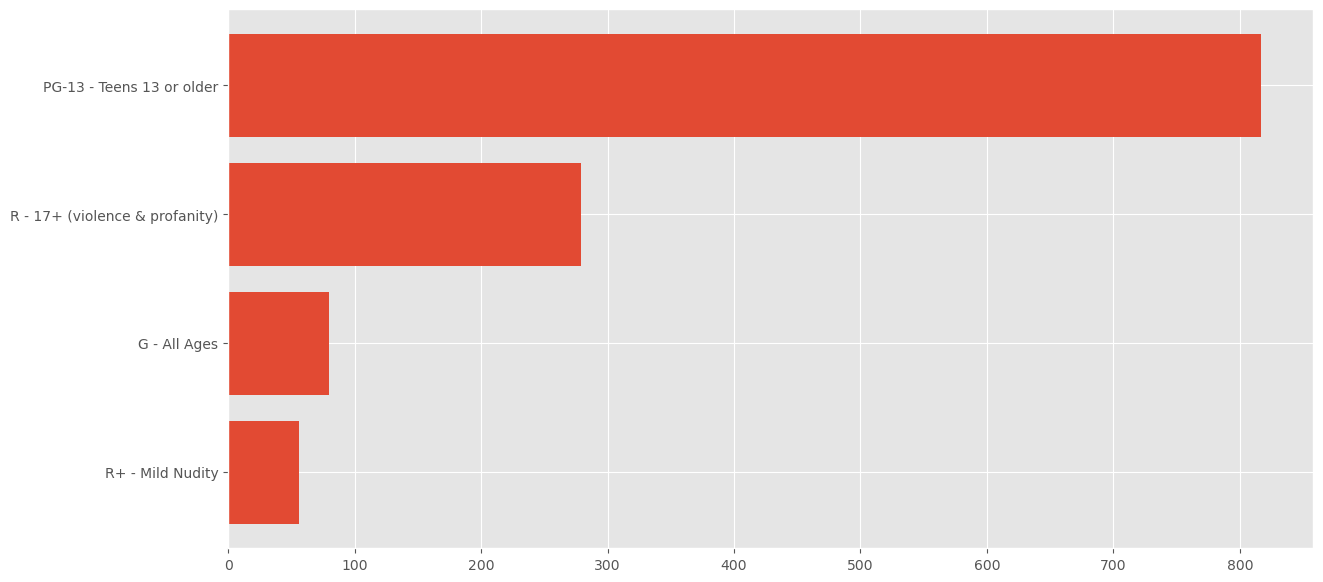

In [117]:
plt.figure(figsize=(14,7))
rating_count = df.groupby('rating')['rating'].count().sort_values().to_frame()[1:]
plt.barh(rating_count.index, rating_count['rating'])
plt.show()

and here comes the sad part for ever anime lover and defender
<br>
the plot show that the majorty of the top animes ranting are for **Teens 13 or older** over (600 of 1000)
<br>
But there is a good production going to the **R rating(17+)**